Venus to Jupiter conjunctions

In [71]:
import pandas as pd
import datetime as dt
import quandl
import matplotlib.pyplot as plt

quandl_key = "YOUR KEY"
plt.rcParams.update({"figure.figsize":(21, 13), "grid.alpha":0.21})
plt.style.use("seaborn-whitegrid")

In [72]:
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_conjunctions_(astronomy)")
get = [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16] # selecting data from wiki page

spx = quandl.get("CHRIS/CME_SP1")
spx = spx.loc[dt.date(2004, 1, 1):]

In [73]:
df_all = pd.DataFrame()

for i in get:
    xx = df[i]
    xx = xx.iloc[1:, [0, 2, 4]]
    xx = xx[((xx[2] == "Venus") & (xx[4] == "Jupiter"))]
    xx[0] = pd.to_datetime(xx[0], format="%B %d, %Y")
    xx.set_index(xx[0], inplace=True)
    df_all = pd.concat([df_all, xx], axis=0)
    
df_all = df_all.sort_index(ascending=True)

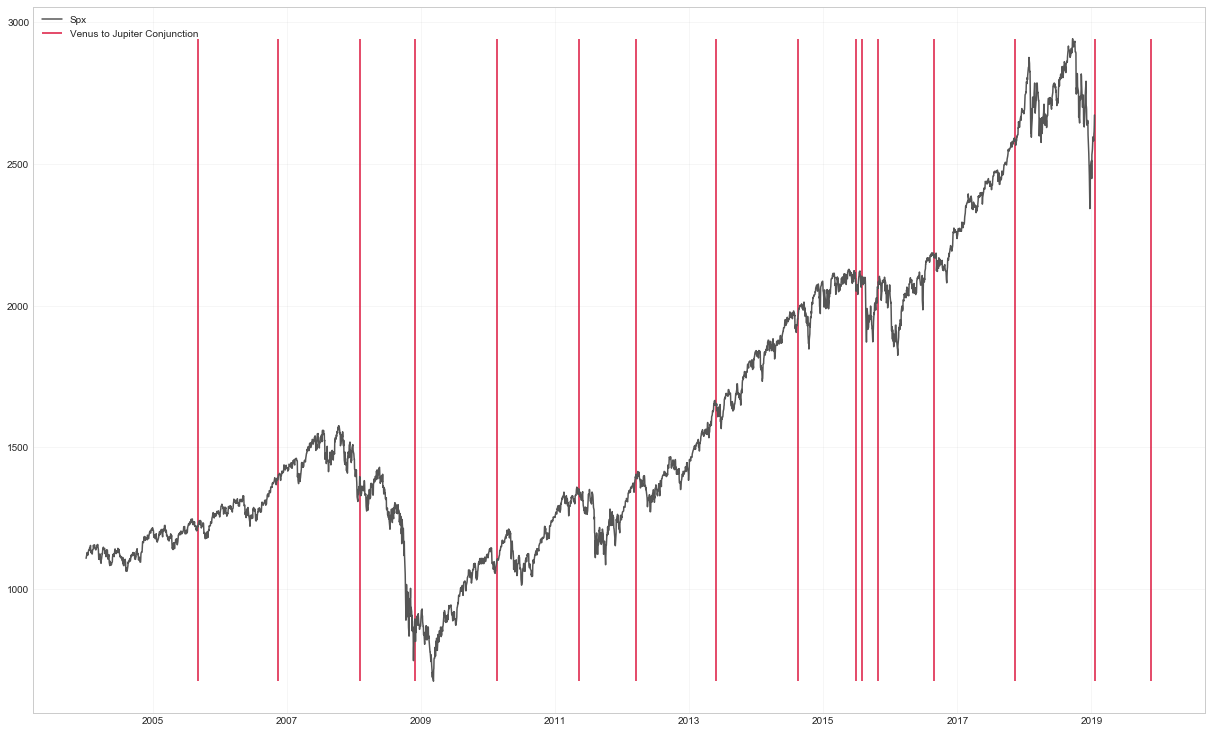

In [74]:
plt.plot(spx["Settle"], color="#555555", label="Spx")
plt.vlines(df_all.index, color="crimson", ymin=spx["Settle"].min(), ymax=spx["Settle"].max(), label="Venus to Jupiter Conjunction")
plt.legend(loc="upper left")